In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('spotify_2015_2025_85k.csv')

In [15]:
df.shape

(85000, 19)

In [16]:
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [17]:
df.columns

Index(['track_id', 'track_name', 'artist_name', 'album_name', 'release_date',
       'genre', 'duration_ms', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'instrumentalness', 'tempo', 'stream_count',
       'country', 'explicit', 'label'],
      dtype='object')

In [ ]:
df.info()
# Found two columns with missing rows : track_name , album_name
# Unusual dtype columns : release_date (should be datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

In [19]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,explicit
count,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,8.500000e+04,85000.000000
mean,254913.824294,48.162894,0.520710,0.505412,5.515988,-27.999300,0.500141,0.399781,129.948351,2.143547e+05,0.201329
std,95300.233207,14.829752,0.270799,0.279774,3.454069,15.598365,0.500003,0.231470,40.444321,1.680637e+06,0.400996
min,90004.000000,0.000000,0.050000,0.020000,0.000000,-55.000000,0.000000,0.000000,60.000000,1.000000e+03,0.000000
25%,171871.500000,38.000000,0.290000,0.260000,2.750000,-41.470000,0.000000,0.198000,94.840000,1.000000e+03,0.000000
50%,254920.500000,47.000000,0.520000,0.500000,6.000000,-27.970000,1.000000,0.399000,129.990000,2.000000e+03,0.000000
75%,337203.250000,57.000000,0.760000,0.750000,9.000000,-14.500000,1.000000,0.600000,165.030000,9.000000e+03,0.000000
max,420000.000000,100.000000,0.990000,0.990000,11.000000,-1.000000,1.000000,0.800000,200.000000,2.000000e+07,1.000000


In [20]:
df.corr(numeric_only=True)

,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,explicit
duration_ms,1.000000,-0.000556,-0.005154,-0.004043,-0.003547,0.002002,-0.001776,-0.004072,-0.001482,0.000507,-0.003857
popularity,-0.000556,1.000000,0.003193,-0.000378,-0.003287,0.003281,-0.001537,0.002292,-0.002763,0.357505,-0.000903
danceability,-0.005154,0.003193,1.000000,-0.004136,-0.002843,0.002430,0.000173,0.004439,-0.002584,0.000448,0.001612
energy,-0.004043,-0.000378,-0.004136,1.000000,0.004570,0.005471,-0.003853,0.002280,-0.006582,-0.001404,0.001607
key,-0.003547,-0.003287,-0.002843,0.004570,1.000000,0.005597,-0.003193,0.000474,0.002370,-0.001013,-0.002099
loudness,0.002002,0.003281,0.002430,0.005471,0.005597,1.000000,-0.004026,0.002287,-0.001045,-0.001608,0.002366
mode,-0.001776,-0.001537,0.000173,-0.003853,-0.003193,-0.004026,1.000000,-0.001731,-0.003626,-0.001024,-0.004455
instrumentalness,-0.004072,0.002292,0.004439,0.002280,0.000474,0.002287,-0.001731,1.000000,-0.003934,-0.000884,-0.003832
tempo,-0.001482,-0.002763,-0.002584,-0.006582,0.002370,-0.001045,-0.003626,-0.003934,1.000000,-0.001106,-0.004045
stream_count,0.000507,0.357505,0.000448,-0.001404,-0.001013,-0.001608,-0.001024,-0.000884,-0.001106,1.000000,-0.001138


In [57]:
for x in df.columns:
    if len(df[x].unique())>25 :
        print(f'Column name : {x} \n Unique values count : {len(df[x].unique())} ')
    else:
        print(f'Column name : {x} \n Unique value count : {len(df[x].unique())} \n Unique values : {df[x].unique()}')

Column name : track_id 
 Unique values count : 85000 
Column name : track_name 
 Unique values count : 68952 
Column name : artist_name 
 Unique values count : 62391 
Column name : album_name 
 Unique values count : 43171 
Column name : release_date 
 Unique values count : 4018 
Column name : genre 
 Unique value count : 12 
 Unique values : ['Pop' 'Metal' 'Rock' 'Indie' 'Country' 'Classical' 'Hip-Hop' 'EDM'
 'Reggaeton' 'Folk' 'Jazz' 'R&B']
Column name : duration_ms 
 Unique values count : 75084 
Column name : popularity 
 Unique values count : 99 
Column name : danceability 
 Unique values count : 95 
Column name : energy 
 Unique values count : 98 
Column name : key 
 Unique value count : 12 
 Unique values : [ 9  0  8  1 10  3  2  5  6  7  4 11]
Column name : loudness 
 Unique values count : 5401 
Column name : mode 
 Unique value count : 2 
 Unique values : [0 1]
Column name : instrumentalness 
 Unique values count : 801 
Column name : tempo 
 Unique values count : 13967 
Column n

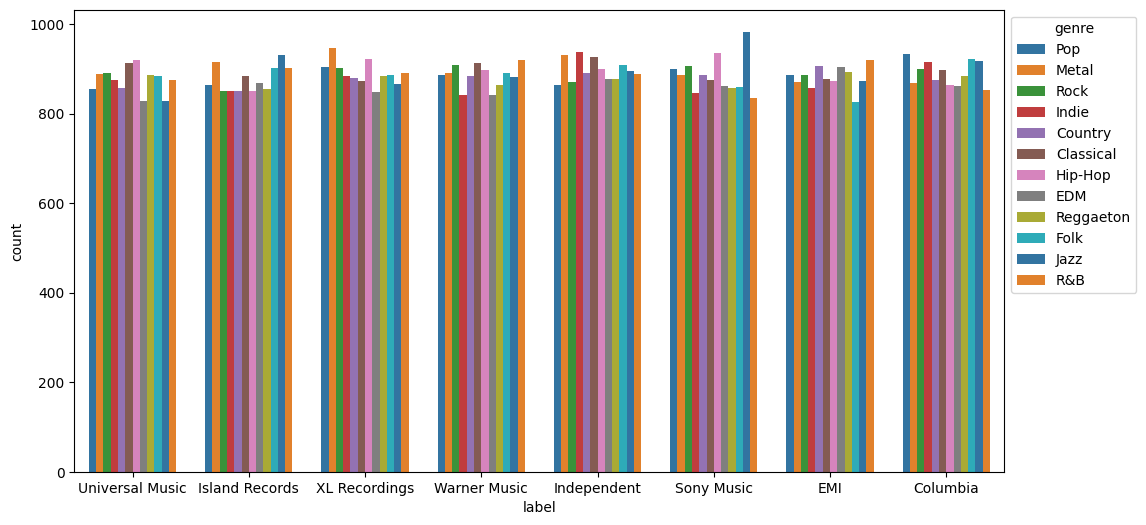

In [ ]:
plt.figure(figsize=(12,6))
# ax is an object created for this graph
ax = sns.countplot(
    data = df ,
    x = 'label',
    hue = 'genre',
    palette='tab10',
    width = 0.75
)
sns.move_legend(ax,'upper left',bbox_to_anchor=(1,1)) # Moves the legend to upper left and outside
